In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
x_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])

In [17]:
df = pd.DataFrame(x_train)

x0 = df[0].values
x1 = df[1].values


1.0

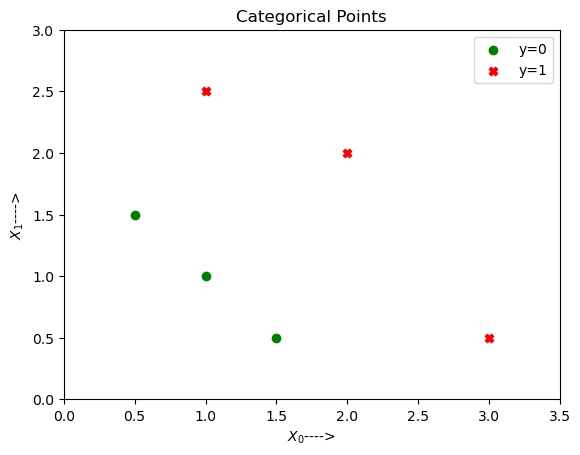

In [11]:
#ploting datas

plt.scatter(x0[:3],x1[:3], c='g' ,label ='y=0')
plt.scatter(x0[3:],x1[3:], c='r' , marker ='X' , label ='y=1')
plt.axis([0,3.5,0,3])
plt.xlabel("$X_0$---->",fontsize = 10)
plt.ylabel("$X_1$---->", fontsize = 10)
plt.legend()
plt.title("Categorical Points")
plt.show()

In [12]:
def sigmoid(z):
    exp = np.exp(-z)
    g = 1/(1+exp)
    return g

In [65]:
def cost(x,y,w,b):
    m = x.shape[0]
    cost =0.0
    for i in range(m):
        z = np.dot(x[i],w) +b
        f_wb = sigmoid(z)
        loss = -y[i]*np.log(f_wb) - (1-y[i])*np.log(1-f_wb)
        cost+=loss
    cost/=m
    return cost

In [95]:
def gradient(x,y,w,b):
    m = x.shape[0]
    dj_dw =np.zeros(1)
    dj_db = 0.0
    for i in range(m):
        z = np.dot(x[i], w) + b
        f_wb = sigmoid(z)
        err = f_wb - y[i]
#         for j in range(n):
#             dj_dw[j] += err * x[i,j]
        dj_dw += err * x[i]
        dj_db += err
    dj_dw /=m
    dj_db/=m
    return dj_dw, dj_db

In [31]:
dj_dw , dj_db = gradient(x_train, y_train,np.array([2.,4.]),3.)  

print(dj_dw)
print(dj_db)

[0.49988331 0.49993852]
0.49991309069975715


In [69]:
def gradient_descent(x,y,w,b,alpha,iters):
    j =[]
    for i in range(iters):
        grad_w,grad_b = gradient(x,y, w,b)
        
        w = w - alpha*grad_w
        b = b- alpha *grad_b
        
        j.append(cost(x,y,w,b))
        if i % (iters/10)==0:
                 print(f"Iteration {i}: Cost = {cost(x,y,w,b)}")
    return w,b

In [70]:
w_in = np.zeros_like(x_train[0])
b =0.
alpha =0.1
iters = 10000
w ,b = gradient_descent(x_train, y_train, w_in , b , alpha, iters )
w,b

Iteration 0: Cost = 0.684610468560574
Iteration 1000: Cost = 0.1590977666870457
Iteration 2000: Cost = 0.08460064176930078
Iteration 3000: Cost = 0.05705327279402531
Iteration 4000: Cost = 0.04290759421682
Iteration 5000: Cost = 0.03433847729884557
Iteration 6000: Cost = 0.02860379802212006
Iteration 7000: Cost = 0.02450156960879306
Iteration 8000: Cost = 0.02142370332569295
Iteration 9000: Cost = 0.019030137124109114


(array([5.28123029, 5.07815608]), -14.222409982019837)

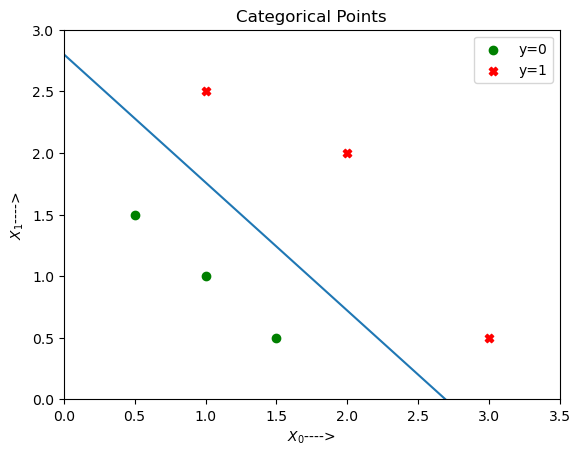

In [76]:
x = -b/w[0]
y = -b/w[1]
plt.plot([0,x],[y,0])
plt.scatter(x0[:3],x1[:3], c='g' ,label ='y=0')
plt.scatter(x0[3:],x1[3:], c='r' , marker ='X' , label ='y=1')
plt.axis([0,3.5,0,3])
plt.xlabel("$X_0$---->",fontsize = 10)
plt.ylabel("$X_1$---->", fontsize = 10)
plt.legend()
plt.title("Categorical Points")
plt.show()

In [77]:
# Another data set

x_train = np.array([0., 1, 2, 3, 4, 5])
y_train = np.array([0,  0, 0, 1, 1, 1])

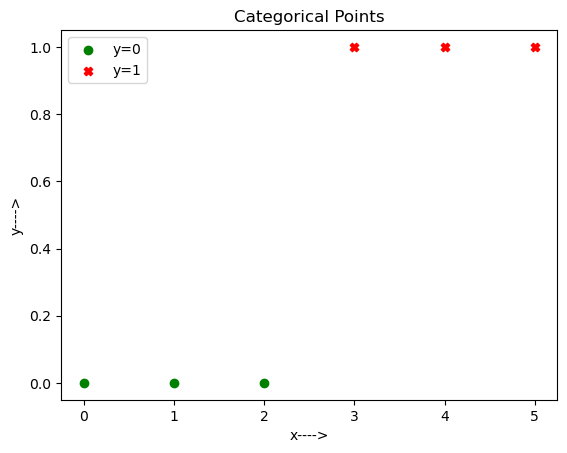

In [82]:
plt.scatter(x_train[:3],y_train[:3], c='g' ,label ='y=0')
plt.scatter(x_train[3:],y_train[3:], c='r' , marker ='X' , label ='y=1')
# plt.axis([0,6,0,1.5])
plt.xlabel("x---->",fontsize = 10)
plt.ylabel("y---->", fontsize = 10)
plt.legend()
plt.title("Categorical Points")
plt.show()

In [96]:
w, b= gradient_descent(x_train,y_train,0,0,0.1,10000)
print(w)
print(b)

Iteration 0: Cost = [0.64331581]
Iteration 1000: Cost = [0.11329299]
Iteration 2000: Cost = [0.07793459]
Iteration 3000: Cost = [0.06111398]
Iteration 4000: Cost = [0.0506706]
Iteration 5000: Cost = [0.04339776]
Iteration 6000: Cost = [0.03799054]
Iteration 7000: Cost = [0.03379356]
Iteration 8000: Cost = [0.03043365]
Iteration 9000: Cost = [0.02767979]
[5.1198735]
[-12.60950311]


[-12.60950311  -7.48962962  -2.36975612   2.75011738   7.86999087
  12.98986437]


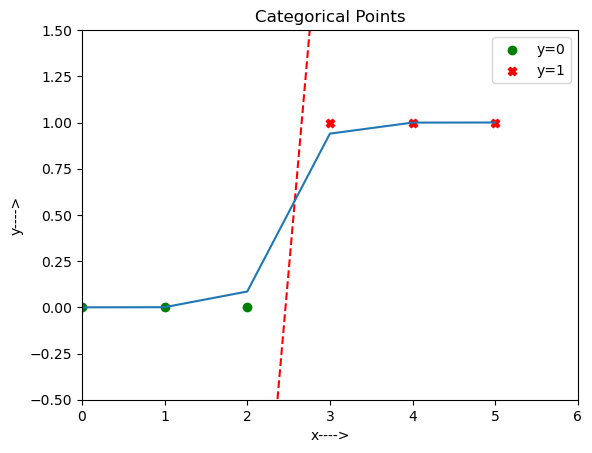

In [106]:
y = np.dot(x_train,w[0]) +b[0] # line to classify
gz =[]
for i in range(len(x_train)):
    gz.append(sigmoid(w[0] * x_train[i] + b))
g = np.array(gz)
plt.plot(x_train,y ,'r--')  # plot line to classify
plt.scatter(x_train[:3],y_train[:3], c='g' ,label ='y=0')
plt.scatter(x_train[3:],y_train[3:], c='r' , marker ='X' , label ='y=1')
plt.axis([0,6,-0.5,1.5])
plt.xlabel("x---->",fontsize = 10)
plt.ylabel("y---->", fontsize = 10)
plt.legend()
plt.title("Categorical Points")
plt.plot(x_train,g)
plt.show()

In [104]:
print(cost(x_train,y_train,w[0],b[0]))

0.025382267578155145
